In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1: Megan Ball
- Name 2: Amber Clark
- Name 3: Matt Farrow
- Name 4: Blake Freeman

________

# In Class Assignment Five
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) before the end of class. Be sure to save the notebook before uploading.

<a id="top"></a>
## Contents
* <a href="#testing">Testing R Magics</a>
* <a href="#understand">Understanding the Data Representation</a>
* <a href="#apriori">Finding Frequent Items</a>
* <a href="#candidates">Generating Candidates</a>
* <a href="#arules">Using ARules and ARulesViz</a>

________________________________________________________________________________________________________

<a id="testing"></a>
<a href="#top">Back to Top</a>

## Running in the 'R' Ecosystem with magics
If you did not get Rpy2, R, or the dependencies arules and arulesViz installed on your system, then you will need to skip this part and go on to the first question. You will need to run the appropriate block of code in this notebook depending on if you have Rpy2 running or not. Each block is marked appropriately, so read the block before running it. 

In [3]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
#==========================
#IF USING R, RUN THIS CODE
#==========================
# You will need to have R installed, as well as Rpy2 and the arules library
from rpy2.robjects.packages import importr
from rpy2 import robjects as robj

# this way we can write r code by simply writing %R
%load_ext rmagic
%load_ext rpy2.ipython 
# this enables the %R extension to iPython (does not work outside of the iPython shell)

# these packages will need to be installed
# open R and run 
#     install.package(arules)
#     install.package(arulesViz)

arules = importr('arules') # same as importing in R with the "library" command
arules_viz = importr('arulesViz') # visualize the different rules

/Library/Python/2.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


If you receive a warning on the above block, try to run it again and verify that everything is loaded properly.
___


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE    0.05      2     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [49 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


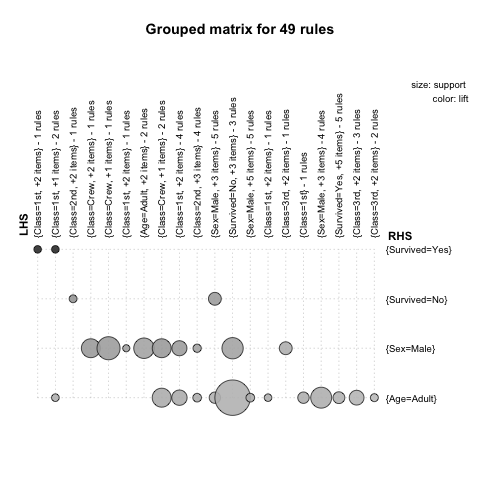

Arules run now from R, test complete


In [5]:
#==========================
#IF USING R, RUN THIS CODE
#==========================

%R load("titanic2.raw.rdata")
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8))
%R rules.sorted <- sort(rules, by="lift")
%R plot(rules.sorted, method="grouped")

print('Arules run now from R, test complete')

___
<a id="understand"></a>
<a href="#top">Back to Top</a>
## Understanding the dataset
We have used the titanic dataset before in class, however this dataset has been pruned to only include the social class, sex, age (as a nominal), and if the individual survived. The data can be stored in many ways, but is stored here as a table of values. 

**Question**: Is this dataset a typical example of *transaction* data (*i.e.*, like the grocery store transaction data)? Why or Why not? What makes it similar or different? **Hint**: think about the possible itemset lattice and how it might be different/similar. What makes an item in this dataset?

___
Enter your answer here:

It is not a typical example of transaction data. Each row identifies a person and their related data and each row has an equal amount of items. Transaction data can be any number of items per transaction. In this data set, items are also mutually exclusive which is not typical, which means there will not be a fully formed item lattice.



___

<a id="apriori"></a>
<a href="#top">Back to Top</a>
## Frequent Itemsets and Apriori
Run the following line of code to grab the R loaded data.frame and save it into a pandas dataframe. 

Please run the appropriate block of code for whether you have Ry2 installed or not!

In [6]:
#==========================
#IF USING R, RUN THIS CODE
#==========================
# Use rmagics to save the dataframe into pandas
#(R output)(python var) ( this is all R code)
%R -o df_from_R df_from_R <- titanic.raw

# now we have the exact same dataset as the one from R
# but it is now a pandas dataframe
print(df_from_R.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 1 to 2201
Data columns (total 4 columns):
Class       2201 non-null object
Sex         2201 non-null object
Age         2201 non-null object
Survived    2201 non-null object
dtypes: object(4)
memory usage: 86.0+ KB
None


In [7]:
#===============================
# IF NOT USING R RUN THIS CODE
#===============================
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_from_R = pd.read_csv('Rframe_as_pandas.csv')
df_from_R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 5 columns):
Unnamed: 0    2201 non-null int64
Class         2201 non-null object
Sex           2201 non-null object
Age           2201 non-null object
Survived      2201 non-null object
dtypes: int64(1), object(4)
memory usage: 86.1+ KB


Text(0.5, 1.0, 'Support count for some 3-itemsets')

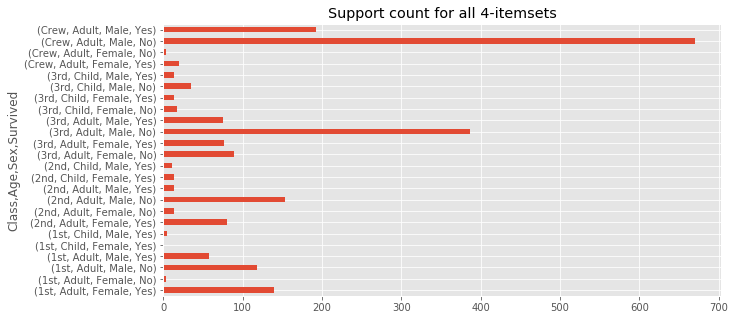

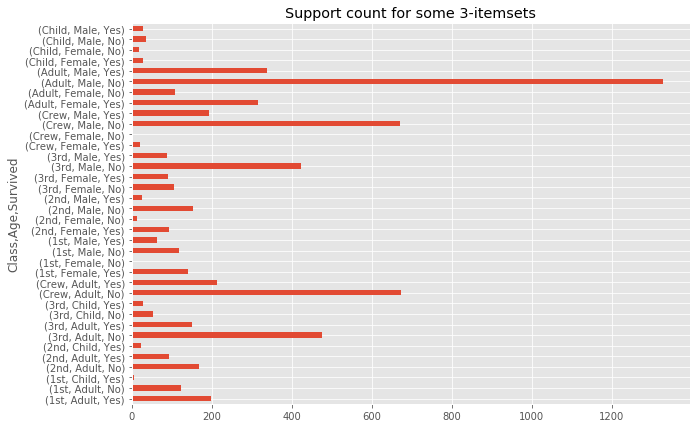

In [8]:
#==========================================
# RUN THIS CODE NO MATTER IF USING R OR NOT
#==========================================
plt.style.use('ggplot')

# Now lets plot the number of times each itemset occurs graphically
# find counts of the four itemsets
f = plt.figure(figsize=(10,5))
df_grouped = df_from_R.groupby(by=['Class','Age','Sex'])
ax = df_grouped.Survived.value_counts().plot(kind='barh')
plt.title('Support count for all 4-itemsets')

# find all the three itemsets and concat them
f = plt.figure(figsize=(10,7))
df_grouped = df_from_R.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts()

pd.concat((countsA,countsB,countsC)).plot(kind='barh')
plt.title('Support count for some 3-itemsets')



Use the graphs above to estimate the values for the following quantities. You do not need to calculate counts from the dataset, just try to get close by viewing from the graph. Recall that for a given rule, $X\rightarrow Y$, the confidence is given by 
$$c=\frac{\sigma( X \cup Y)}{\sigma( X )} $$

**Questions**: Given the graphs above, what is the support count, $\sigma$, and support, $s$, for the itemset {1st, Adult, Yes}? What about the itemset {1st, Adult, Yes, Female}?

**Question**: What is the confidence, $c$, for the rule {1st, Adult, Yes} $\rightarrow$ {Female}? 

___
Enter your answer here:

The support 𝑠 for {1st, Adult, Yes} is 197 and the support count 𝜎 is 197/2201 = 0.0895.

The support 𝑠 for {1st, Adult, Yes, Female} is 140 and the support count 𝜎 is 140/2201 = 0.0636.

The confidence for the rule {1st, Adult, Yes} --> {Female} is 140/197 = 0.7106 = 71.06%


In [11]:
# Insert any calculations needed to answer the above question here
cnts = df_from_R.groupby(by=['Class','Age','Sex','Survived']).count()
print(cnts.iloc[1])
num_XUY = cnts.iloc[1].values

cnts = df_from_R.groupby(by=['Class','Age','Survived']).count()
print(cnts.iloc[1])
num_X = cnts.iloc[1].values

print(float(num_XUY) / num_X)

print(197/2201)
print(140/2201)

Unnamed: 0    140
Name: (1st, Adult, Female, Yes), dtype: int64
Unnamed: 0    197
Sex           197
Name: (1st, Adult, Yes), dtype: int64
[0.7106599 0.7106599]
0.08950477055883689
0.06360745115856428



___
**Question**: What is the support count (an integer) for a *minsup* threshold of 0.25? Using the support count graphs above, which itemsets would be considered frequent with a *minsup* of 0.25? Are any of the 4-itemsets also maximal for this value of *minsup*? Why or Why not?

___
Enter your answer here:

The support count for a minsup of 0.25 is 550. 

The itemsets that are frequent with a minsup of 0.25:
{Crew, Adult, No} at 673
{Crew, Male, No} at 670
{Adult, Male, No} at 1329

Of the 4 itemsets, {Crew, Adult, Male, No} is also maximal because its support count is around 670ish.

In [24]:
# Insert any calculations needed to answer the above question here

sup = 0.25*2201
print(sup, int(sup))

cnts = df_from_R.groupby(by=['Class','Age','Sex','Survived']).count()
#print(cnts[cnts>sup].dropna())

df_grouped = df_from_R.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts()

tmp = pd.concat((countsA,countsB,countsC))
#print(tmp[tmp>sup])

print(countsA[countsA>sup])
print(countsB[countsB>sup])
print(countsC[countsC>sup])

550.25 550
Class  Age    Survived
Crew   Adult  No          673
Name: Survived, dtype: int64
Class  Sex   Survived
Crew   Male  No          670
Name: Survived, dtype: int64
Age    Sex   Survived
Adult  Male  No          1329
Name: Survived, dtype: int64


___
# Start of Live Session Assignment
<a id="candidates"></a>
<a href="#top">Back to Top</a>
### Generating candidates 
Assume that the 3-itemset bar graph above contains ALL the possible frequent 3-itemsets in the titanic dataset and their support count. 

**Exercise**: If the minimum support count equals 200, then use the bar graph to select the 3-itemsets that are frequent. Use these itemsets and the apriori principle to generate candidate 4-itemsets that might be frequent. Please show your thought process. 

___
Enter your answer here:

3-itemsets: <br>
{Adult, Male, Yes}; {Adult, Male, No}; {Adult, Female, Yes}; {Crew, Male, No}; {3rd, Male, No}; {Crew, Adult, Yes}; {Crew, Adult, No}; {3rd, Adult, No}

4-itemsets: <br>
{Adult, Male, Crew, No} - this is because on the graph it is higher than 200, and it is also a subset of {Crew, Male, No}, {Adult, Male, No}, and {Crew, Adult, No} which were all individually frequent 3-itemsets.<br>
{3rd, Adult, Male, No} - this is also because the support count is higher than 200 on the graph, and its a subset of the 3-itemsets.

___
<a id="arules"></a>
<a href="#top">Back to Top</a>
## Using the Arules Package to Interpret Data
Run the following R code to run the Apriori algorithm on the titanic dataset. 

**Exercise**: Change the parameters of the apriori algorithm in order to check your results from the previous question. That is, change the minlen, supp, and conf parameters so that it only displays 4-itemsets with minimum "support count" of 200. Do the itemsets from the resulting rules match with what you found in the previous questions? Should they? Why or why not?

In [4]:
#==========================
# IF USING R RUN THIS CODE
#==========================
library(arules)

load("titanic2.raw.rdata")
rules <- apriori(titanic.raw,parameter = list(minlen=4, supp=0.09, conf=0.01))
rules.sorted <- sort(rules, by="support")
inspect(rules.sorted)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.09      4
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 198 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [8 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                                   rhs           support   confidence
[1] {Class=Crew,Sex=Male,Survived=No}  => {Age=Adult}   0.3044071 1.0000000 
[2] {Class=Crew,Age=Adult,Survived=No} => {Sex=Male}    0.3044071 0.9955423 
[3] {Class=Crew,Sex=Male,Age=Adult}    => {Survived=No} 0.

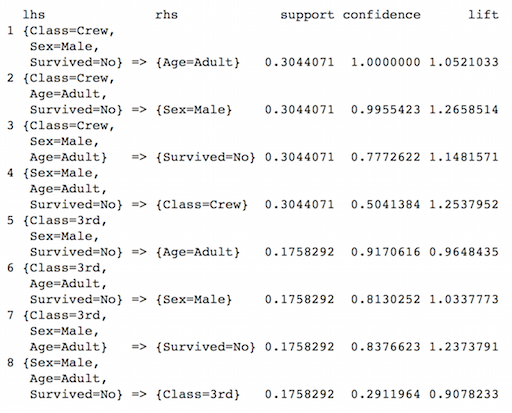

In [25]:
#========================================================================================================
# IF NOT USING R RUN THIS CODE (It is an example snapshot of using arules) AND INTERPRET THE OUTPUTS
#========================================================================================================
from IPython.display import Image
Image('R_arules_output.png')

#========================================================================================================
# Also, change the parameters to the following line of code to what you think they should be to answer the question:
#========================================================================================================

rules <- apriori(titanic.raw,parameter = list(minlen=4, supp=0.09, conf=0.01))

___
Enter your answer here:

Yes these item sets do match to what we found above. They do not have to match because we assumed that everything that was not already in the 3-itemset graph was NOT frequent.


___

## Using the Arules Viz Package 
Now run the following code to visualize the rules from the previous step. There are various parameters built into the visualization such as support, confidence, and a parameter known as "lift." Lift is a measure that ranks different rules using the equation 
$$ Lift = \frac{P(Y|X)}{P(Y)} = \frac{c(X\rightarrow Y)}{s(Y)} $$
In practice, there are many different measures that we use to rank the rules from a dataset, but, at the end of the day, a human evaluates which rules are most subjectively interesting. The arulesViz library allows many different types of interpretations for looking at lift and confidence together. The documentation is here:
http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf 

The styles of plot are "scatterplot", "two-key plot", "matrix", "matrix3D", "graph", "paracoord" or "grouped." Each provides a different view of the rules. Try at least three plots using the boilerplate code below (you just need to change the "method" parameter of the plot). After looking at the visualizations answer the following:

**Question**: Which rules are the most interesting according to Lift, according to confidence, and, lastly, according to you? Why?

[1] "The Graphic for rules grouped by lift and their support"


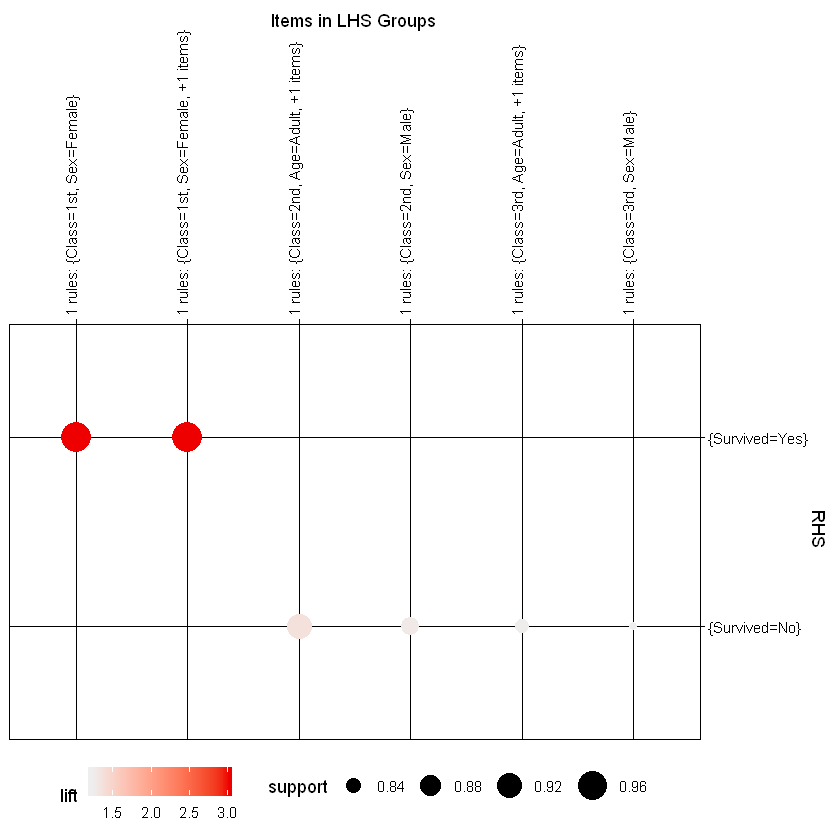

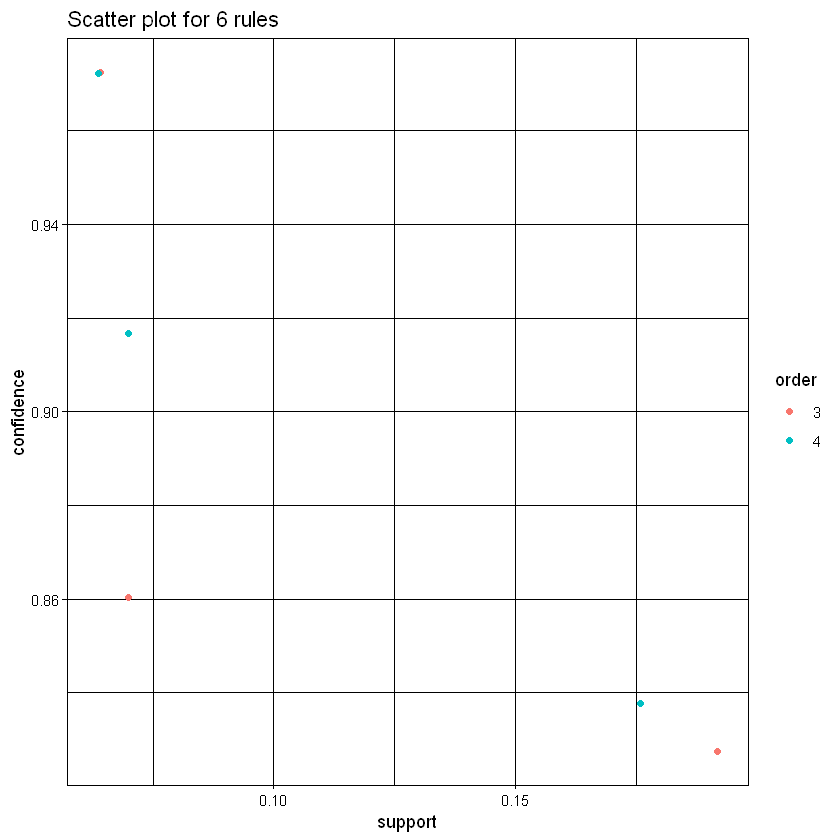

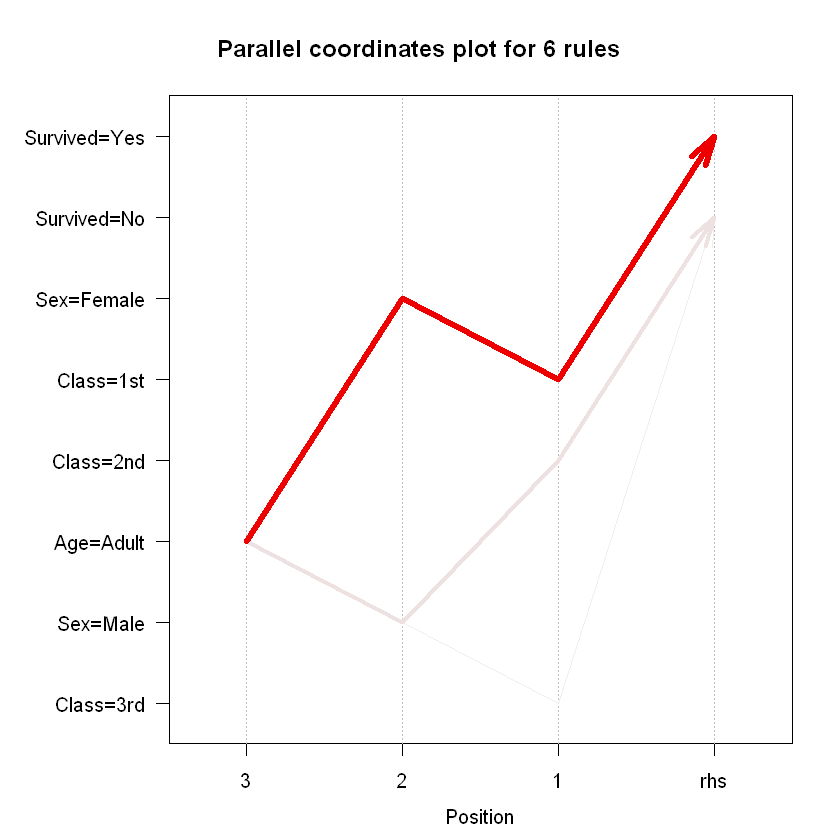

In [9]:
#=========================================
# IF USING R, RUN THIS CODE
#=========================================
library(arulesViz)
# do not change the arules code
rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8), appearance = list(rhs=c("Survived=No", "Survived=Yes"), default="lhs"), control = list(verbose=F))
rules.sorted <- sort(rules, by="lift")


print('The Graphic for rules grouped by lift and their support')

# change or add plots using the following lines:
plot(rules.sorted, method="grouped", measure = 'confidence', shading='lift')

# change or add plots using the following lines:
plot(rules.sorted, method="two-key plot", measure = 'confidence', shading='lift')

# change or add plots using the following lines:
plot(rules.sorted, method="paracoord", measure = 'confidence', shading='lift')


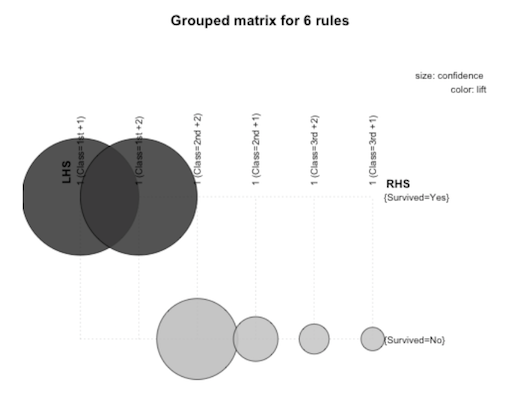

In [14]:
#======================================================================
#IF NOT USING R RUN THIS BLOCK AND THE BLOCK AFTERWARD TO SEE EXAMPLES 
#======================================================================
from IPython.display import Image
Image('Arules_grouped.png')

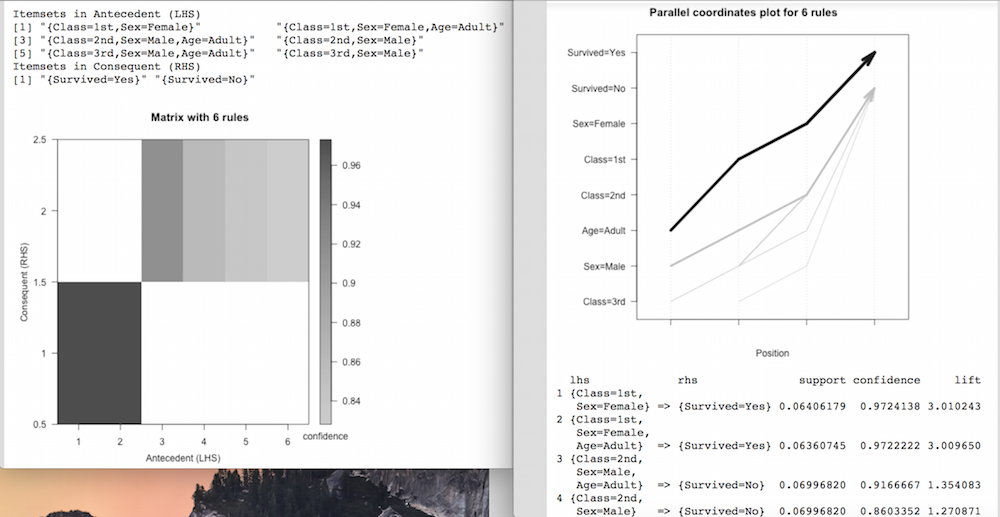

In [15]:
Image('Arules_graph2_3.png')

___
Enter your answer here:

According to lift and confidence, the most interesting rule is {1st, Female} => {Survived = Yes} with confidence at 0.97 and lift at 3.01. As a close second, {1st, Female, Adult} => {Survived = Yes} at confidence of 0.97 and lift rounded up to 3.01.

Based on the "women and children first" rule for rescuing passengers on the Titanic, none of these rules seem all that interesting. You would expect females and especially first class passengers to survive, and the top two rules tell us that females first class passengers survived. You would also expect it to be less likely for male and non-first class passengers to not survive. The other rules tell us that males and non-first class passengers did not survive.
___


**Question**: Who is the lead author (and maintainer) for the arules package and the arulesViz package? What University does he/she currently teach at?

http://cran.r-project.org/web/packages/arules/arules.pdf

http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf

___
Enter your answer here:

Dr. M. Hahsler, SMU

___



________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook** and please include **team member names** in the notebook submission.